In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("./iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

data = data.drop("Id",axis=1)
print(data.shape)

data.info()

## no null values in the dataset

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


D:\Anaconda\envs\gpu\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


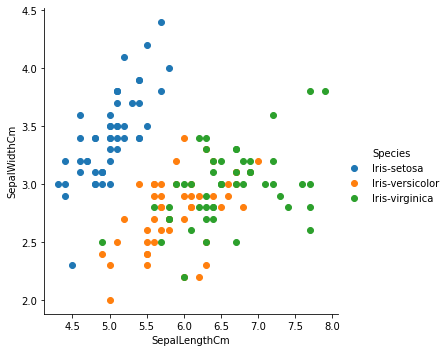

In [4]:
import seaborn as sns
k = sns.FacetGrid(data,hue='Species',size=5)
k.map(plt.scatter,'SepalLengthCm','SepalWidthCm')
k.add_legend()

## you can get some of the insights from this

D:\Anaconda\envs\gpu\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


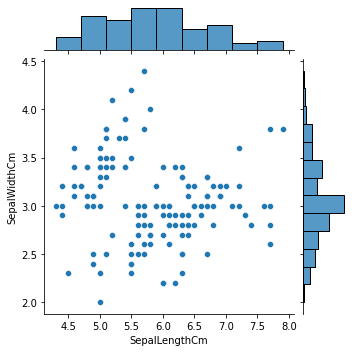

In [5]:
## we can use jointplot also to get the scatter and bar graph in one single graph
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=data,size=5)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

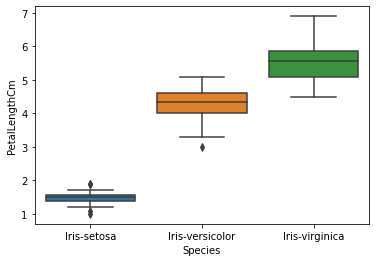

In [6]:
sns.boxplot(x='Species',y='PetalLengthCm',data=data)

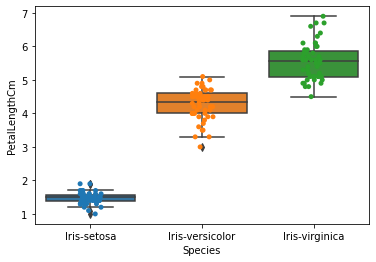

In [7]:
fig1 = sns.boxplot(x='Species',y='PetalLengthCm',data=data)
fig1 = sns.stripplot(x='Species',y='PetalLengthCm',data=data,jitter=True)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

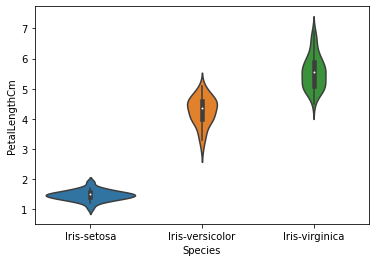

In [8]:
## instead of using the box plot, lets use the violin plot
## it will solve all our issues

sns.violinplot(x='Species',y='PetalLengthCm',data=data,size=5)

D:\Anaconda\envs\gpu\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


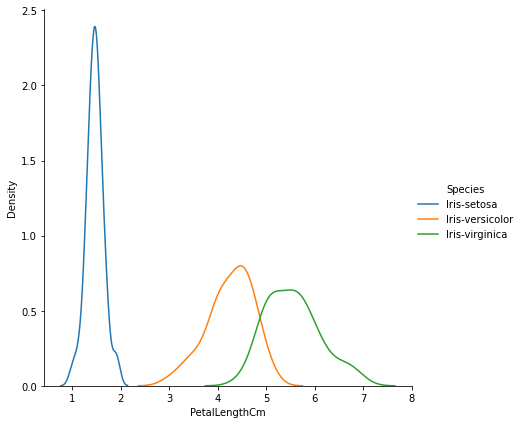

In [9]:
fig = sns.FacetGrid(data,hue='Species',size=6)
fig.map(sns.kdeplot,'PetalLengthCm')
fig.add_legend()

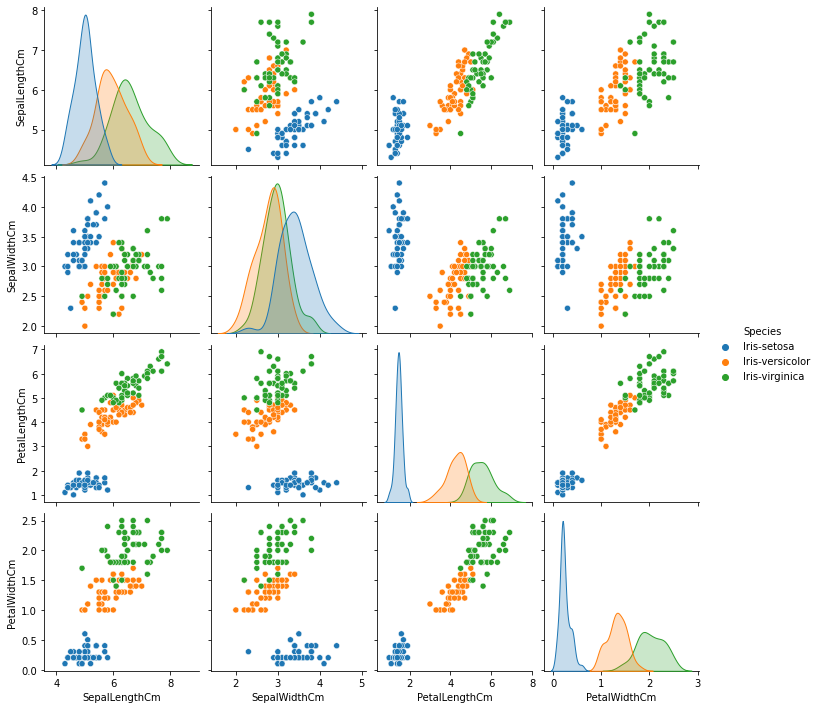

In [10]:
sns.pairplot(data,hue='Species')

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

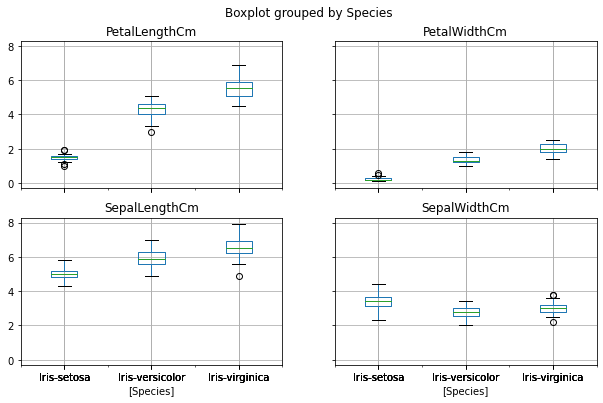

In [11]:
data.boxplot(by='Species',figsize=(10,6))

<AxesSubplot:>

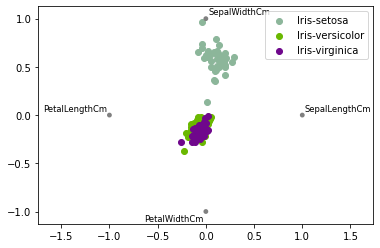

In [12]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature


pd.plotting.radviz(data, "Species")

In [13]:
import seaborn as sns
import matplotlib_venn as venn
from math import pi


## Parallel Plots

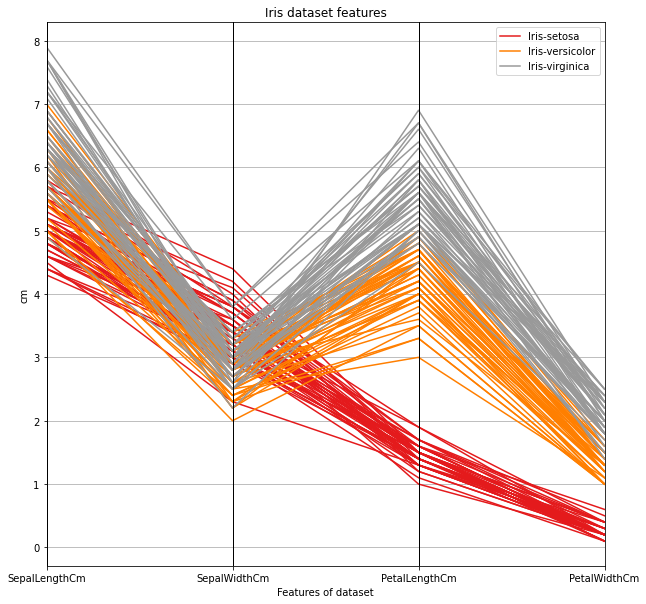

In [46]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,10))
parallel_coordinates(data,'Species',colormap=plt.get_cmap("Set1"))

plt.title("Iris dataset features")
plt.xlabel("Features of dataset")
plt.ylabel("cm")


## Network Charts

In [15]:
corr = data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


         level_0        level_1         0
0  SepalLengthCm  SepalLengthCm  1.000000
1  SepalLengthCm   SepalWidthCm -0.109369
2  SepalLengthCm  PetalLengthCm  0.871754
3  SepalLengthCm   PetalWidthCm  0.817954
4   SepalWidthCm  SepalLengthCm -0.109369


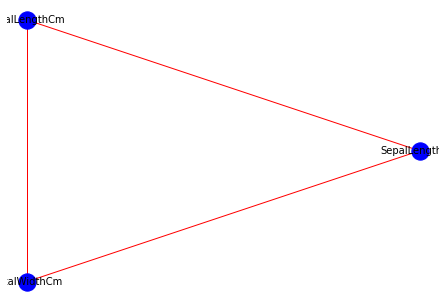

In [47]:
## pip install networkx
import networkx as nx

links = corr.stack().reset_index()

print(links.head())

links.columns = ['var1','var2','value']
threshold = 0.6

link_filtered = links.loc[(links['value']>=threshold) & (links['var1']!=links['var2'])]
G=nx.from_pandas_edgelist(link_filtered, 'var1', 'var2')

nx.draw_circular(G, with_labels=True, node_color='blue', node_size=300, edge_color='red', linewidths=1, font_size=10)


## Venn diagram

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


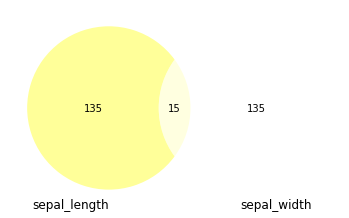

In [35]:
print(data.columns)

sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]

from matplotlib_venn import venn2
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15,15), 
    set_labels = ('sepal_length', 'sepal_width'),set_colors=['yellow','white'])


## Donut Chart

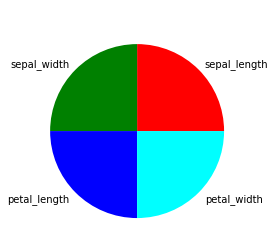

In [44]:
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(data.SepalLengthCm), len(data.SepalWidthCm), len(data.PetalLengthCm), len(data.PetalWidthCm)]
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"])
plt.title("Number of Each Features",color = "white")
plt.show()

In [49]:
## y is the categorical column
## so lets use label_encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])


In [18]:
X = data.drop('Species',axis=1)
y = data['Species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)


## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

model_lg = lg.fit(X_train,y_train)
y_pred  = model_lg.predict(X_test)
model_lg.score(X_test,y_test)



0.9440499084897118

In [20]:
from sklearn import metrics

print("intercept -> ", model_lg.intercept_)
print("coefficients -> ", model_lg.coef_)
print("Mean Absolute Error -> ", metrics.mean_absolute_error(y_test,y_pred))
print("r2 value -> ", metrics.r2_score(y_test,y_pred))

intercept ->  0.18843285987439107
coefficients ->  [-0.10432192 -0.06468018  0.26203697  0.53157395]
Mean Absolute Error ->  0.15394701101724323
r2 value ->  0.9440499084897118


## Decision Tree Algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt = model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

model_dt.score(X_test, y_test)


1.0

In [22]:
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

model_rf.score(X_test,y_test)

1.0

In [24]:
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
y_pred = model_log.predict(X_test)
model_log.score(X_test,y_test)

1.0

In [26]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
model_knn.score(X_test,y_test)

1.0

## Naive Bayes

It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

In [37]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

model_nb.score(X_test,y_test)

0.9777777777777777

## SVM

In [38]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)

model_svm.score(X_test,y_test)

1.0

## Nu-Support Vector Classification

In [39]:
from sklearn.svm import NuSVC
model_NuSVC = NuSVC()
model_NuSVC.fit(X_train,y_train)

model_NuSVC.score(X_test,y_test)

1.0